# Lab Assignment 2 - Elizabeth Ngiam
## 210001976
[Repository](https://github.com/wiselkie/Assignment2_Repo)


# Part 4: Python GeoPandas

### Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install additional relevant libraries

In [2]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 41.0 MB/s eta 0:00:00


Import the libraries

In [3]:
import geopandas as gpd
import fiona as fn
import shapely as spy
import pyproj as pyp
import rtree as rt
import contextily as ctx
import folium as flm
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mapclassify as mpc
import zipfile
import os

### Task 1: Read the dataset (shapefile) you download as GeoPandas DataFrame.

In [4]:
# Read the external file and view its dataframe
simd = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Assignment 2 Data/SG_SIMD_2012/SG_SIMD_2012.shp')
simd

,DataZone,LACode,LAName,NearSett,SAPE2010,WASAPE2010,Score,Rank,IncRate,NumIncDep,...,GAccRank,CrimeScore,CrimeRank,Quintile,Decile,Vigintile,Percentile,Shape_Leng,Shape_Area,geometry
0,S01000001,100.0,Aberdeen City,Peterculter,914.0,612.0,10.043655,4726.0,8.0,75.0,...,3420.0,144.0,4839.0,4.0,8.0,15.0,73.0,12834.265269,4.465936e+06,"POLYGON ((383761.188 800775.311, 383771.836 80..."
1,S01000002,100.0,Aberdeen City,Aberdeen,662.0,442.0,3.824865,6214.0,1.0,5.0,...,2151.0,0.0,6486.5,5.0,10.0,20.0,96.0,2765.762760,3.089499e+05,"POLYGON ((395167.388 800776.203, 395171.029 80..."
2,S01000003,100.0,Aberdeen City,Aberdeen,795.0,602.0,3.730586,6238.0,2.0,15.0,...,3036.0,128.0,5066.0,5.0,10.0,20.0,96.0,2339.841599,1.330458e+05,"POLYGON ((394936.000 800980.000, 394944.704 80..."
3,S01000004,100.0,Aberdeen City,Aberdeen,621.0,453.0,4.404422,6068.0,0.0,5.0,...,1462.0,122.0,5133.0,5.0,10.0,19.0,94.0,2490.039812,1.997742e+05,"POLYGON ((394550.000 800920.000, 394581.000 80..."
4,S01000005,100.0,Aberdeen City,Peterculter,605.0,432.0,5.218358,5883.0,5.0,30.0,...,3431.0,185.0,4331.0,5.0,10.0,19.0,91.0,3248.681878,1.582738e+05,"POLYGON ((383752.000 801118.000, 383754.509 80..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,S01006501,400.0,West Lothian,Linlithgow,947.0,674.0,4.255763,6113.0,1.0,10.0,...,1009.0,0.0,6185.0,5.0,10.0,19.0,94.0,1821.894127,1.530475e+05,"POLYGON ((302248.000 677463.000, 302224.000 67..."
6501,S01006502,400.0,West Lothian,Linlithgow,577.0,394.0,4.319349,6095.0,3.0,15.0,...,1387.0,0.0,6239.0,5.0,10.0,19.0,94.0,1609.961540,8.583500e+04,"POLYGON ((301768.000 677282.000, 301563.000 67..."
6502,S01006503,400.0,West Lothian,Linlithgow,662.0,442.0,3.527549,6271.0,2.0,10.0,...,1512.0,0.0,6322.0,5.0,10.0,20.0,97.0,2558.568960,1.845637e+05,"POLYGON ((301643.000 677570.000, 301545.000 67..."
6503,S01006504,400.0,West Lothian,Linlithgow,802.0,532.0,5.335351,5853.0,3.0,25.0,...,886.0,0.0,6083.0,5.0,9.0,18.0,90.0,13460.197608,4.244881e+06,"POLYGON ((305436.000 678748.000, 305467.000 67..."


### Task 2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

<Axes: >

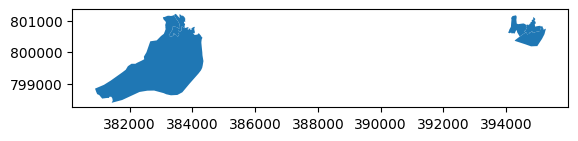

In [5]:
# Use plot() to plot the first 5 sets of records in the dataset
simd_first = simd.head(5)
simd_first.plot()

<Axes: >

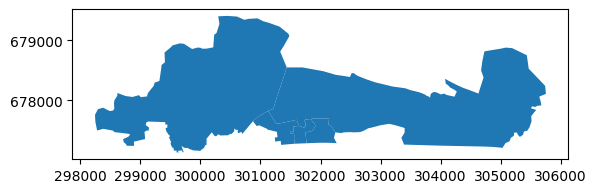

In [6]:
# Use plot() to plot the last 5 sets of records in the dataset
simd_last = simd.tail(5)
simd_last.plot()

### Task 3: Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

In [7]:
# In order to "plot the map using some categorical attribute" (as per assignment instructions),
## we must first create a new dataframe with a reduced number of columns so that the table is more comprehensible to the viewer
small_sample = simd[["DataZone","LAName","Quintile", "Shape_Area", "geometry"]]
small_sample

,DataZone,LAName,Quintile,Shape_Area,geometry
0,S01000001,Aberdeen City,4.0,4.465936e+06,"POLYGON ((383761.188 800775.311, 383771.836 80..."
1,S01000002,Aberdeen City,5.0,3.089499e+05,"POLYGON ((395167.388 800776.203, 395171.029 80..."
2,S01000003,Aberdeen City,5.0,1.330458e+05,"POLYGON ((394936.000 800980.000, 394944.704 80..."
3,S01000004,Aberdeen City,5.0,1.997742e+05,"POLYGON ((394550.000 800920.000, 394581.000 80..."
4,S01000005,Aberdeen City,5.0,1.582738e+05,"POLYGON ((383752.000 801118.000, 383754.509 80..."
...,...,...,...,...,...
6500,S01006501,West Lothian,5.0,1.530475e+05,"POLYGON ((302248.000 677463.000, 302224.000 67..."
6501,S01006502,West Lothian,5.0,8.583500e+04,"POLYGON ((301768.000 677282.000, 301563.000 67..."
6502,S01006503,West Lothian,5.0,1.845637e+05,"POLYGON ((301643.000 677570.000, 301545.000 67..."
6503,S01006504,West Lothian,5.0,4.244881e+06,"POLYGON ((305436.000 678748.000, 305467.000 67..."


In [8]:
# Subsequently, filter the data using a corresponding boolean Series
new_sample = small_sample['LAName'] == 'West Lothian'
new_sample

0       False
1       False
2       False
3       False
4       False
        ...  
6500     True
6501     True
6502     True
6503     True
6504     True
Name: LAName, Length: 6505, dtype: bool

In [9]:
# Lastly, pass the series as an index to the dataframe. It now contains only the rows where LAName is West Lothian
new_simd =  small_sample[new_sample]
new_simd

,DataZone,LAName,Quintile,Shape_Area,geometry
6294,S01006295,West Lothian,3.0,5.402940e+07,"POLYGON ((303539.000 655950.000, 303460.000 65..."
6295,S01006296,West Lothian,4.0,6.472402e+07,"POLYGON ((312454.000 665082.000, 312549.000 66..."
6296,S01006297,West Lothian,2.0,2.402327e+05,"POLYGON ((292948.000 660780.000, 293002.000 66..."
6297,S01006298,West Lothian,3.0,3.766846e+05,"POLYGON ((293712.567 660774.706, 293730.000 66..."
6298,S01006299,West Lothian,1.0,2.165699e+05,"POLYGON ((293362.000 660658.000, 293421.000 66..."
...,...,...,...,...,...
6500,S01006501,West Lothian,5.0,1.530475e+05,"POLYGON ((302248.000 677463.000, 302224.000 67..."
6501,S01006502,West Lothian,5.0,8.583500e+04,"POLYGON ((301768.000 677282.000, 301563.000 67..."
6502,S01006503,West Lothian,5.0,1.845637e+05,"POLYGON ((301643.000 677570.000, 301545.000 67..."
6503,S01006504,West Lothian,5.0,4.244881e+06,"POLYGON ((305436.000 678748.000, 305467.000 67..."


In [10]:
# Now, we can create a map where we can explore the selected dataset
new_simd.explore(column='Quintile', cmap='RdYlBu')

### Task 4: What is the Coordinate Reference System of the selected dataset?

In [11]:
# crs() reveals information on the Coordinate Reference System of the dataset

print('The Coordinate Reference System of the selected dataset is as follows:')
print(' ')
simd.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

The Coordinate Reference System of the selected dataset is as follows:
 


### Task 5: How many features does the selected dataset contain?

In [12]:
# As 'features' refers to 'rows', we will identify the number of rows in the selected dataset
simd_features = len(simd.axes[0])
print("Number of features: ", simd_features)

Number of features:  6505


### Task 6: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [13]:
# Categorical attributes refer to data that can be categorised
## I will thus subset 'NearSett'
simd_lin = simd['NearSett'] == 'Linlithgow'
simd_lin

0       False
1       False
2       False
3       False
4       False
        ...  
6500     True
6501     True
6502     True
6503     True
6504     True
Name: NearSett, Length: 6505, dtype: bool

In [14]:
# Subsequently, we pass the series as an index to the dataframe
## The new dataframe now contains only the rows where "'NearSett' = 'Linlithgow'"
simd_gdf =  simd[simd_lin]
simd_gdf

,DataZone,LACode,LAName,NearSett,SAPE2010,WASAPE2010,Score,Rank,IncRate,NumIncDep,...,GAccRank,CrimeScore,CrimeRank,Quintile,Decile,Vigintile,Percentile,Shape_Leng,Shape_Area,geometry
2431,S01002432,240.0,Falkirk,Linlithgow,1447.0,951.0,9.816051,4780.0,6.0,85.0,...,544.0,93.0,5528.0,4.0,8.0,15.0,74.0,19819.168462,1.173423e+07,"POLYGON ((302299.000 681302.000, 302516.000 68..."
6484,S01006485,400.0,West Lothian,Linlithgow,648.0,389.0,4.278871,6106.0,1.0,10.0,...,960.0,81.0,5683.0,5.0,10.0,19.0,94.0,26976.689607,1.562214e+07,"POLYGON ((302275.000 677283.000, 302287.000 67..."
6485,S01006486,400.0,West Lothian,Linlithgow,919.0,635.0,4.722409,5999.0,3.0,30.0,...,1065.0,0.0,6283.0,5.0,10.0,19.0,93.0,20480.345926,8.629914e+06,"POLYGON ((298793.000 676866.000, 298816.000 67..."
6488,S01006489,400.0,West Lothian,Linlithgow,878.0,542.0,15.322075,3542.0,10.0,90.0,...,2234.0,70.0,5835.0,3.0,6.0,11.0,55.0,2635.991001,2.059319e+05,"POLYGON ((299479.000 676349.000, 299435.000 67..."
6489,S01006490,400.0,West Lothian,Linlithgow,757.0,472.0,2.993100,6364.0,0.0,5.0,...,1579.0,0.0,6443.0,5.0,10.0,20.0,98.0,3023.845572,2.387365e+05,"POLYGON ((300524.000 676630.000, 300615.000 67..."
6490,S01006491,400.0,West Lothian,Linlithgow,701.0,389.0,3.175573,6330.0,2.0,15.0,...,1952.0,0.0,6433.0,5.0,10.0,20.0,98.0,3071.566333,2.408722e+05,"POLYGON ((300083.000 676867.000, 300114.000 67..."
6491,S01006492,400.0,West Lothian,Linlithgow,645.0,477.0,12.218990,4202.0,8.0,50.0,...,3955.0,336.0,2860.0,4.0,7.0,13.0,65.0,2945.815707,3.001766e+05,"POLYGON ((299767.000 676509.000, 299634.000 67..."
6492,S01006493,400.0,West Lothian,Linlithgow,586.0,373.0,15.807635,3449.0,14.0,85.0,...,5549.0,158.0,4674.0,3.0,6.0,11.0,54.0,1553.319058,1.229474e+05,"POLYGON ((300083.000 676867.000, 300079.000 67..."
6493,S01006494,400.0,West Lothian,Linlithgow,602.0,363.0,3.540106,6267.0,3.0,15.0,...,3763.0,0.0,6090.0,5.0,10.0,20.0,97.0,4052.798821,4.962078e+05,"POLYGON ((301229.000 677049.000, 301263.000 67..."
6494,S01006495,400.0,West Lothian,Linlithgow,745.0,485.0,7.292017,5357.0,5.0,40.0,...,4110.0,0.0,6209.0,5.0,9.0,17.0,83.0,2236.907850,1.519151e+05,"POLYGON ((298636.354 677121.110, 298633.000 67..."


### Task 7: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [15]:
# Identify potential numerical attributes (i.e., numbers)
simd._get_numeric_data()

,LACode,SAPE2010,WASAPE2010,Score,Rank,IncRate,NumIncDep,IncRank,EmpRate,NumEmpDep,...,GAccScore,GAccRank,CrimeScore,CrimeRank,Quintile,Decile,Vigintile,Percentile,Shape_Leng,Shape_Area
0,100.0,914.0,612.0,10.043655,4726.0,8.0,75.0,4102.0,7.0,45.0,...,14.947282,3420.0,144.0,4839.0,4.0,8.0,15.0,73.0,12834.265269,4.465936e+06
1,100.0,662.0,442.0,3.824865,6214.0,1.0,5.0,6489.0,3.0,15.0,...,24.359864,2151.0,0.0,6486.5,5.0,10.0,20.0,96.0,2765.762760,3.089499e+05
2,100.0,795.0,602.0,3.730586,6238.0,2.0,15.0,6284.0,2.0,10.0,...,17.392077,3036.0,128.0,5066.0,5.0,10.0,20.0,96.0,2339.841599,1.330458e+05
3,100.0,621.0,453.0,4.404422,6068.0,0.0,5.0,6494.0,2.0,10.0,...,32.165671,1462.0,122.0,5133.0,5.0,10.0,19.0,94.0,2490.039812,1.997742e+05
4,100.0,605.0,432.0,5.218358,5883.0,5.0,30.0,5308.0,4.0,15.0,...,14.863494,3431.0,185.0,4331.0,5.0,10.0,19.0,91.0,3248.681878,1.582738e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,400.0,947.0,674.0,4.255763,6113.0,1.0,10.0,6462.0,3.0,20.0,...,39.867418,1009.0,0.0,6185.0,5.0,10.0,19.0,94.0,1821.894127,1.530475e+05
6501,400.0,577.0,394.0,4.319349,6095.0,3.0,15.0,6110.0,3.0,15.0,...,33.289861,1387.0,0.0,6239.0,5.0,10.0,19.0,94.0,1609.961540,8.583500e+04
6502,400.0,662.0,442.0,3.527549,6271.0,2.0,10.0,6398.0,1.0,5.0,...,31.494340,1512.0,0.0,6322.0,5.0,10.0,20.0,97.0,2558.568960,1.845637e+05
6503,400.0,802.0,532.0,5.335351,5853.0,3.0,25.0,5883.0,3.0,20.0,...,42.535976,886.0,0.0,6083.0,5.0,9.0,18.0,90.0,13460.197608,4.244881e+06


In [16]:
# Then, subset features of the GeoDataFrame using a corresponding Boolean Series
## Here, I chose 'CrimeScore'
simd_crime = simd['CrimeScore'] == 0
simd_crime

0       False
1        True
2       False
3       False
4       False
        ...  
6500     True
6501     True
6502     True
6503     True
6504     True
Name: CrimeScore, Length: 6505, dtype: bool

In [17]:
# Lastly, we pass the series as an index to the dataframe
## The new dataframe now contains only the rows where "'CrimeScore' = 0"
simd_gdf2 =  simd[simd_crime]
simd_gdf2

,DataZone,LACode,LAName,NearSett,SAPE2010,WASAPE2010,Score,Rank,IncRate,NumIncDep,...,GAccRank,CrimeScore,CrimeRank,Quintile,Decile,Vigintile,Percentile,Shape_Leng,Shape_Area,geometry
1,S01000002,100.0,Aberdeen City,Aberdeen,662.0,442.0,3.824865,6214.0,1.0,5.0,...,2151.0,0.0,6486.5,5.0,10.0,20.0,96.0,2765.762760,3.089499e+05,"POLYGON ((395167.388 800776.203, 395171.029 80..."
18,S01000019,100.0,Aberdeen City,Milltimber,693.0,345.0,5.070660,5918.0,3.0,20.0,...,1524.0,0.0,6138.0,5.0,10.0,19.0,91.0,4050.785906,3.273915e+05,"POLYGON ((385856.000 801480.000, 385836.000 80..."
21,S01000022,100.0,Aberdeen City,Aberdeen,746.0,443.0,4.055634,6167.0,1.0,10.0,...,961.0,0.0,5985.0,5.0,10.0,19.0,95.0,5170.335785,7.213938e+05,"POLYGON ((387236.367 803075.199, 387295.962 80..."
23,S01000024,100.0,Aberdeen City,Peterculter,525.0,329.0,6.345336,5602.0,3.0,15.0,...,530.0,0.0,6196.0,5.0,9.0,18.0,87.0,23347.737505,1.421450e+07,"POLYGON ((379344.000 804836.000, 379539.000 80..."
28,S01000029,100.0,Aberdeen City,Aberdeen,1050.0,653.0,4.553448,6042.0,1.0,10.0,...,678.0,0.0,6466.0,5.0,10.0,19.0,93.0,2686.062027,1.989332e+05,"POLYGON ((387877.000 803118.000, 387886.000 80..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,S01006501,400.0,West Lothian,Linlithgow,947.0,674.0,4.255763,6113.0,1.0,10.0,...,1009.0,0.0,6185.0,5.0,10.0,19.0,94.0,1821.894127,1.530475e+05,"POLYGON ((302248.000 677463.000, 302224.000 67..."
6501,S01006502,400.0,West Lothian,Linlithgow,577.0,394.0,4.319349,6095.0,3.0,15.0,...,1387.0,0.0,6239.0,5.0,10.0,19.0,94.0,1609.961540,8.583500e+04,"POLYGON ((301768.000 677282.000, 301563.000 67..."
6502,S01006503,400.0,West Lothian,Linlithgow,662.0,442.0,3.527549,6271.0,2.0,10.0,...,1512.0,0.0,6322.0,5.0,10.0,20.0,97.0,2558.568960,1.845637e+05,"POLYGON ((301643.000 677570.000, 301545.000 67..."
6503,S01006504,400.0,West Lothian,Linlithgow,802.0,532.0,5.335351,5853.0,3.0,25.0,...,886.0,0.0,6083.0,5.0,9.0,18.0,90.0,13460.197608,4.244881e+06,"POLYGON ((305436.000 678748.000, 305467.000 67..."


### Task 8: Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

<Axes: >

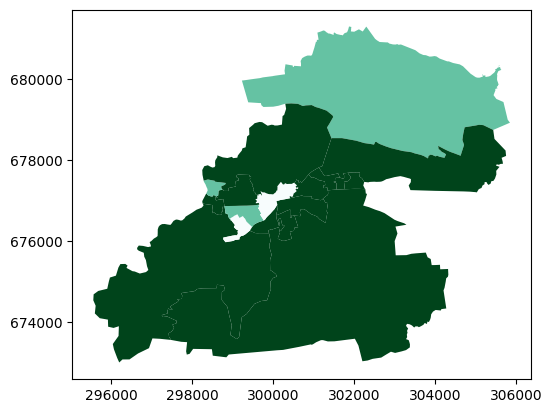

In [18]:
# Using the geopandas dataframe created in Task 6, the following choropleth map is plotted
simd_gdf.plot(column="Quintile", cmap="BuGn")

# Part 5: Python Rasterio

### Install additional relevant libraries

In [19]:
pip install earthpy rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.9 MB/s eta 0:00:00


### Import the libraries

In [20]:
import rasterio as rio
import earthpy as et

### Task 1: Read the file as a rasterio dataset

In [21]:
# The rasterio open() method allows for data to be read from the disk
elev = rio.open('/content/drive/MyDrive/Colab Notebooks/Assignment 2 Data/elev.tif')

# Data from a raster band can be accessed by the band’s index number.
## Here, we will read access the dataset as an array:
elev_arr = elev.read(1)
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [22]:
# Disconnect via close()
elev.close

<bound method DatasetBase.close of <open DatasetReader name='/content/drive/MyDrive/Colab Notebooks/Assignment 2 Data/elev.tif' mode='r'>>

### Task 2: What is the CRS of the dataset?

In [23]:
# CRS of the dataset can be accessed through crs()
print(elev.crs)

EPSG:32617


### Task 3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.

In [24]:
print(str(elev.bounds) + ' displays the extent of the dataset.')
print('Here, we can see that this dataset covers the world from 479753 meters to 668843 meters, left to right, and 4170823 meters to 4347733 meters bottom to top.')
print('Overall, the dataset covers a region 190.09 kilometers wide by 176.91 kilometers high.')
print(' ')
print('The reference system is ' + str(elev.crs) + '.')
print(' ')
print('There is ' + str(elev.count) + ' band in this dataset.')

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138) displays the extent of the dataset.
Here, we can see that this dataset covers the world from 479753 meters to 668843 meters, left to right, and 4170823 meters to 4347733 meters bottom to top.
Overall, the dataset covers a region 190.09 kilometers wide by 176.91 kilometers high.
 
The reference system is EPSG:32617.
 
There is 1 band in this dataset.


### Task 4: Create a plot/map of the raster dataset.

#### Import relevant libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

In [26]:
import rasterio as rio
from rasterio.plot import show
import rasterio.warp
import rasterio.shutil
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import plotting_extent
from rasterio.plot import show_hist
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio import plot

In [27]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

#### Creating a simple raster plot

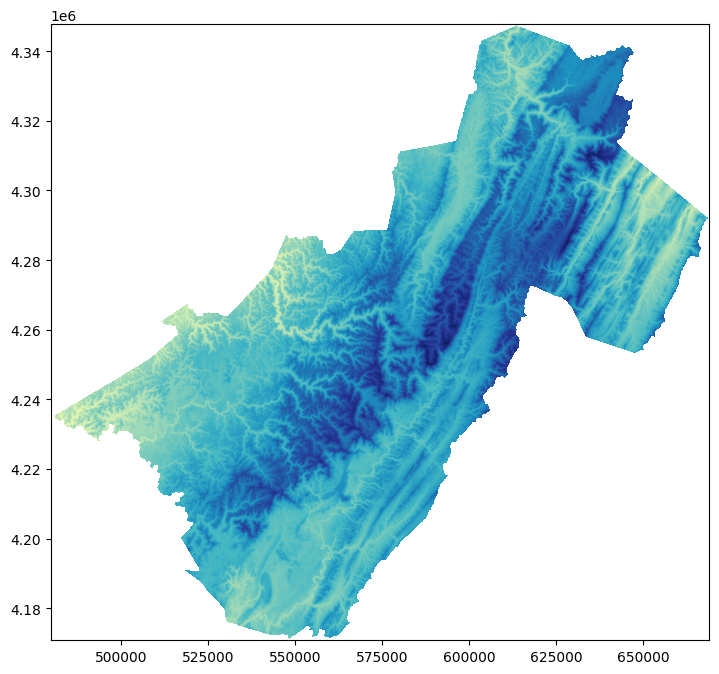

<Axes: >

In [28]:
show(elev, cmap='YlGnBu')

#### The raster data can also be mapped or visualized with matplotlib using the imshow() method.

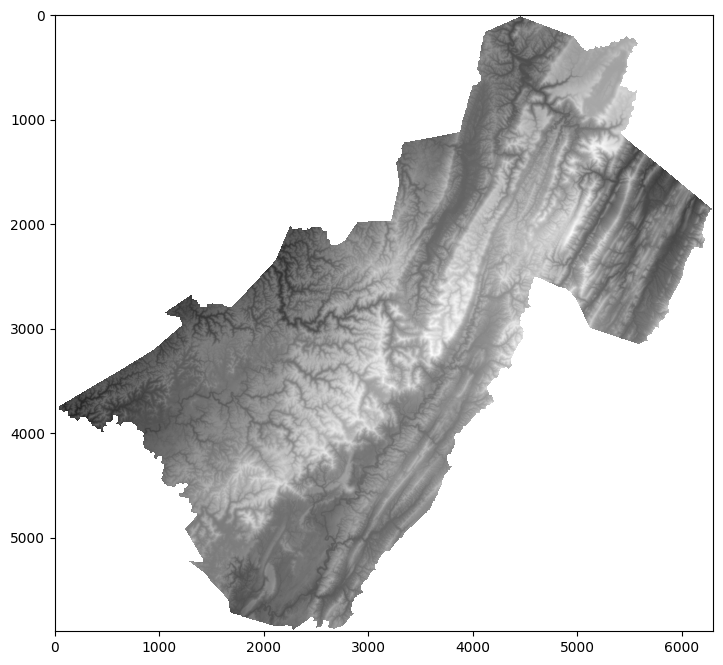

In [29]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == -32768))
plt.imshow(image_read_masked, cmap="gist_gray")

### Task 5: Create Histograms from the raster.

#### Use the hist() function to plot the histograms

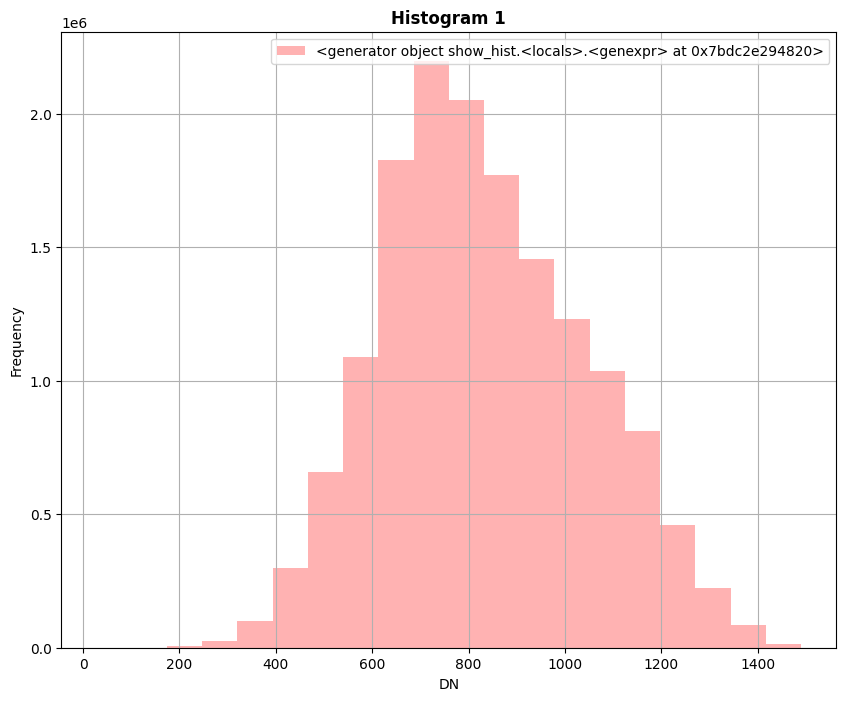

In [30]:
show_hist(elev, bins=20, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram 1")

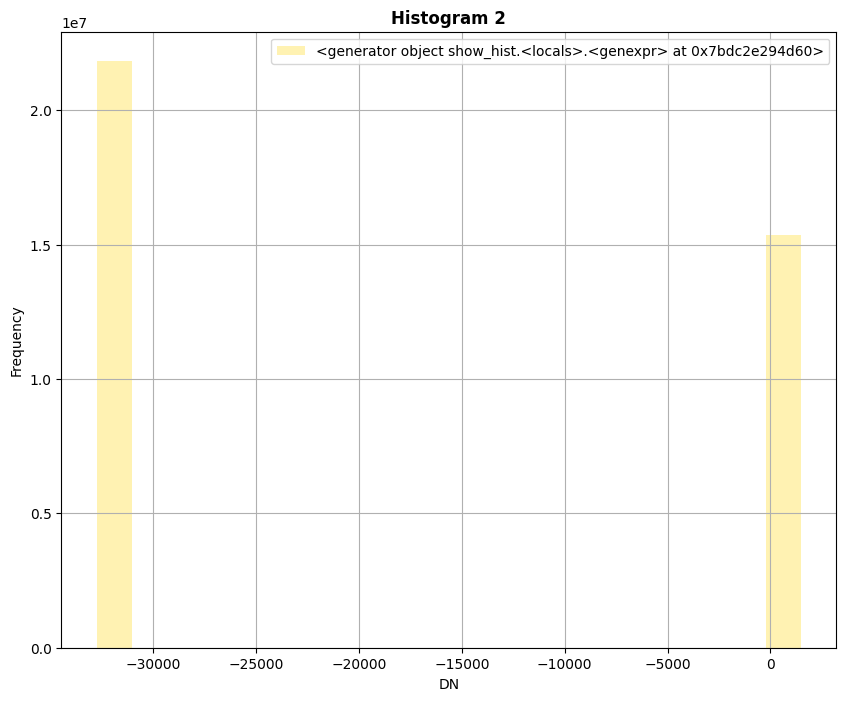

In [31]:
show_hist(elev_arr, bins=20, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram 2")